In [1]:
import math
import warnings

from IPython.display import display
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

%matplotlib inline
pd.options.display.float_format = '{:.3}'.format

warnings.filterwarnings(
action="ignore",
module="scipy",
message="^internal gelsd")


In [208]:
data=pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())
data = data[data.Newspaper < 90]

data['TVsq'] = data['TV'].apply(lambda x: (int(x)) ** (2))
data['Newspapersq'] = data['Newspaper'].apply(lambda x: (int(x)) ** (1/2))

regr = linear_model.LinearRegression()
Y = data[['Sales']]
X = data[['TVsq','Radio','Newspapersq']]
regr.fit(X,Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_ )
print('\nR-squared:')
print(regr.score(X,Y))


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,2.3e+02,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,1.52e+02,41.3,58.5,18.5
4,5,1.81e+02,10.8,58.4,12.9



Coefficients: 
 [[1.42521656e-04 1.82999219e-01 1.96457448e-02]]

Intercept: 
 [5.56763732]

R-squared:
0.8079202163002401


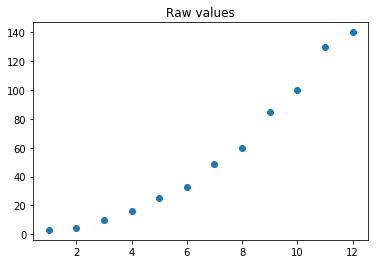

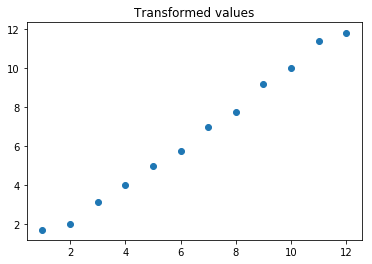

In [195]:
# assume linear relationship

outcome = [1,2,3,4,5,6,7,8,9,10,11,12]
feature = [3,4,10,16,25,33,49,60,85,100,130,140]

plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

sqrt_feature = [math.sqrt(x) for x in feature]

plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

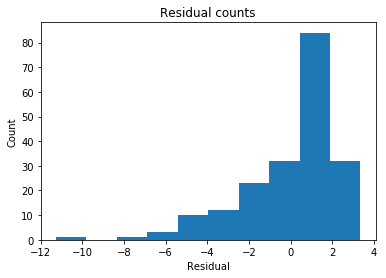

198


In [209]:
#assume multivariate normality

predicted=regr.predict(X).ravel()
actual=data['Sales']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

print(len(predicted))

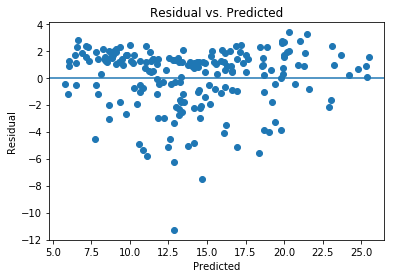

In [213]:
#homoscedasticity

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [152]:
#assume multicollinearity

correlation_matrix = X.corr()
display(correlation_matrix)

,TVsq,Radio,Newspapersq
TVsq,1.0,0.0103,0.00916
Radio,0.0103,1.0,0.339
Newspapersq,0.00916,0.339,1.0


In [214]:
np.average(residual)

1.7045848458891292e-15

While the histogram is not perfectly normal, the average residual value is practically zero.